# <font size=50> <b>LEAD SCORE CASE STUDY

# <b> Import libraraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# <b> Loading Data

In [3]:
df = pd.read_csv("Leads.csv")

# <b> Inspecting Data

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#dimensions of the dataframe
df.shape

(9240, 37)

In [6]:
#type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <b>Data Cleaning

<b> We can see that there is value 'Select' in many columns. This is because the customer did not choose select any option from the options list, and default value is 'Select'. Select values are as good as NULL.

In [8]:
df = df.replace('Select', np.nan)

In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# % of null values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<b> As we can there are a lot of null values in this data set. We can drop all the columns with null values greater than 40%

In [11]:
for i in df.columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, axis = 1, inplace = True)

In [12]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Inspect variable City

In [13]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [14]:
df.City.value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

<b>The number of Null values is more than the most frequent value(Mumbai) for City. We can drop City

In [15]:
df.drop('City', axis = 1, inplace = True)

In [16]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Inspect variable Tags

In [17]:
df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [18]:
df.Tags.value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

<b>The number of Null values is more than the most frequent value for Tags, just like City, we can drop Tags too.

In [19]:
df.drop('Tags', axis = 1, inplace = True)

In [20]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Inspect variable Specialization

In [21]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [22]:
df.Specialization.value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

<b> The number of Null values is too high here, we can drop Specialization as well

In [23]:
df.drop('Specialization', axis = 1, inplace = True)

In [24]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Inspect variable Country

In [25]:
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [26]:
df.Country.value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

<b> We can impute null values with value 'Other'

In [27]:
df.Country.replace(np.nan,'Other', inplace=True)

In [28]:
df.Country.value_counts(dropna=False)

Country
India                   6492
Other                   2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [29]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Inspect variables 'What is your current occupation' & 'What matters most to you in choosing a course'

In [30]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [31]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [32]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

<b>We can impute null values with most frequent values for both the variables

In [34]:
df['What is your current occupation'].replace(np.nan, 'Unemployed', inplace=True)
df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects', inplace=True)

In [35]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

## Handling nulls of remaining 

<b> We can drop the rows with null values for Lead Source, TotalVisits, Total Time Spent on Website & Last Activity as the number of nulls is too low.

In [36]:
df.dropna(inplace=True)

In [37]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

# <b> Exploratory Data Analysis

## Lead Conversion Rate

In [38]:
df.Converted.value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

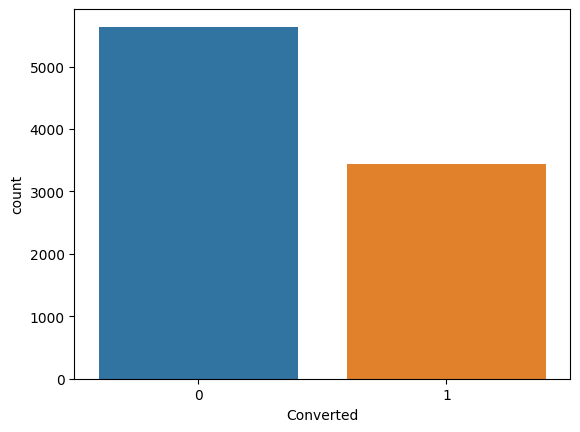

In [39]:
sns.countplot(x='Converted', data=df)
plt.show()

In [40]:
df.Converted.sum()/len(df.Converted)

0.3785541106458012

<b> Lead Conversion Rate = 37.85%

## Categorical Variables

In [41]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Lead Origin

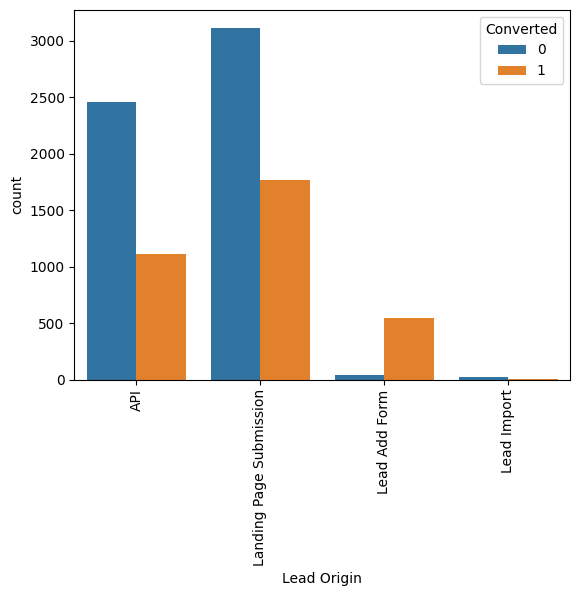

In [42]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Landing Page Submission and API has more number of Leads

### Lead Source

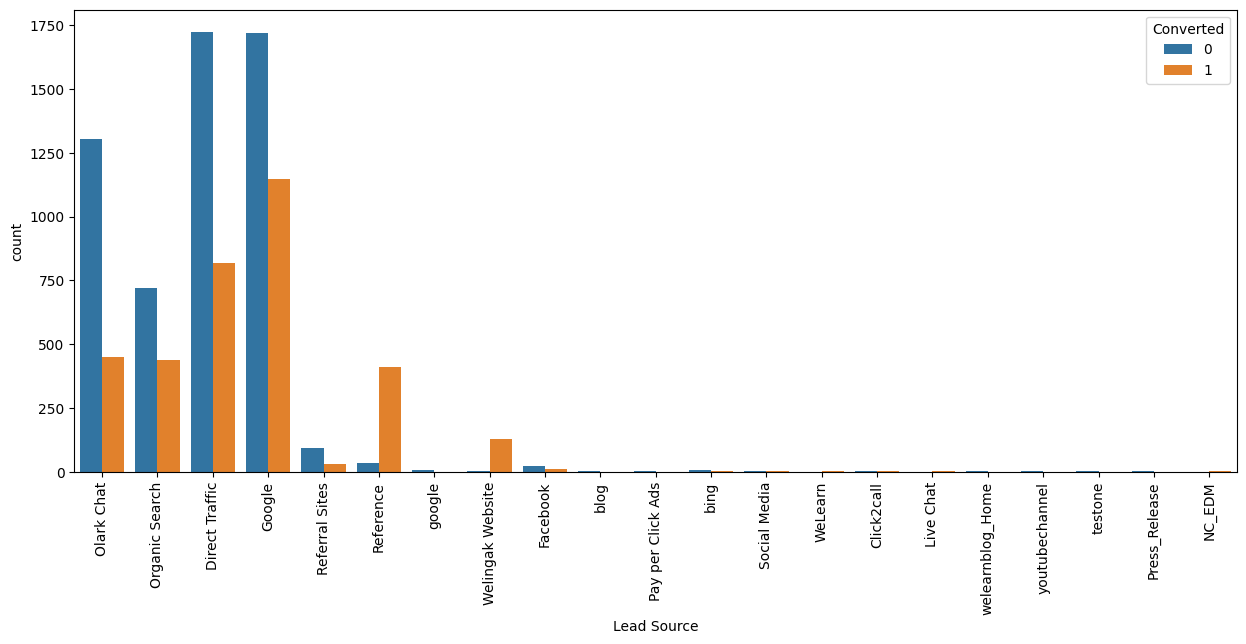

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Google and Direct Traffic has more Leads, but Google has more lead conversion rate.<br> We can see there is a duplicate for 'Goggle' here (google with lower case g) we can rename 'google' to 'Google'

In [44]:
df['Lead Source'].replace('google','Google', inplace=True)

### Do Not Email

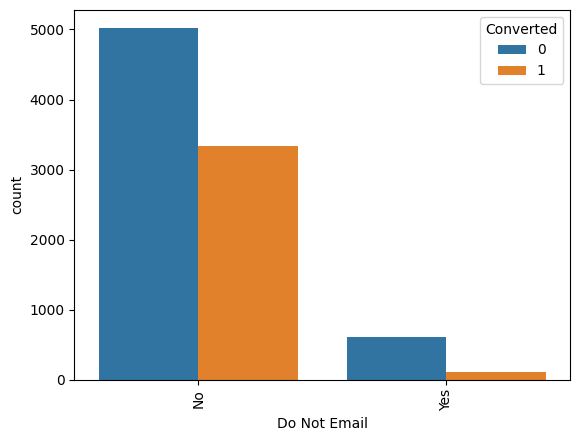

In [45]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

### Do Not Call

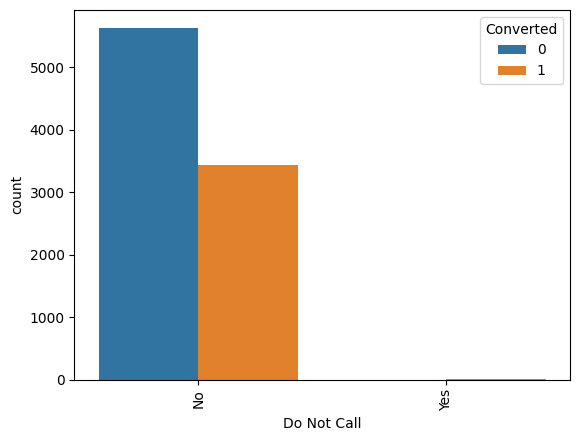

In [46]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>'Do Not Email' and 'Do Not Call' variables has imbalance in data and the can be dropped

In [47]:
df.drop(['Do Not Email','Do Not Call'], axis=1, inplace=True)

### Last Activity & Last Notable Activity

In [48]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                               'Unsubscribed','Email Bounced', 'Resubscribed to emails',
                                                                               'View in browser link Clicked','Approached upfront',
                                                                               'Form Submitted on Website','Email Received',
                                                                               'Visited Booth in Tradeshow'],'Others')

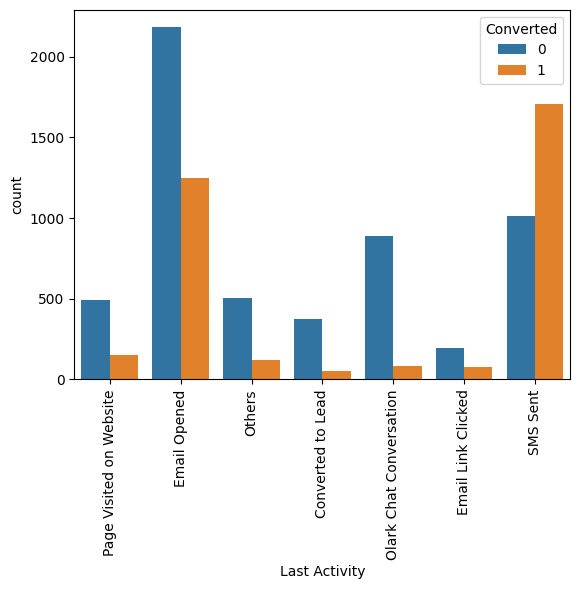

In [49]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Email Opened has most number of leads, and SMS sent has higher Lead COnversion Rate.

In [50]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                               'Unsubscribed','Email Bounced', 'Resubscribed to emails',
                                                                               'View in browser link Clicked','Approached upfront',
                                                                               'Form Submitted on Website','Email Received'],'Others')

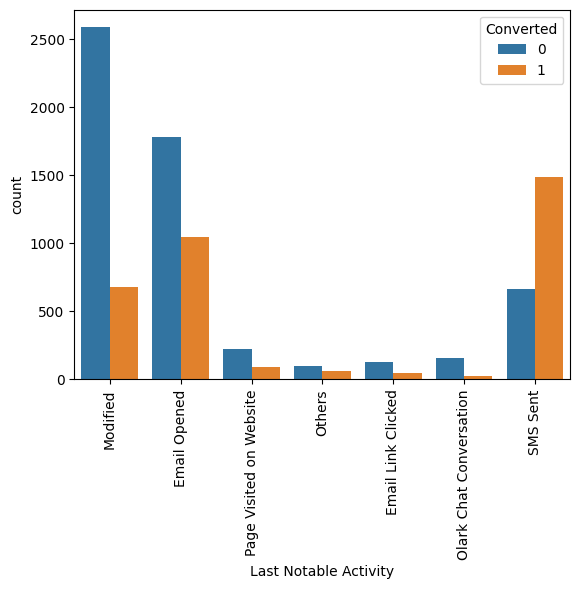

In [51]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Email Opened has most number of leads, and SMS sent has higher Lead COnversion Rate.

### Country

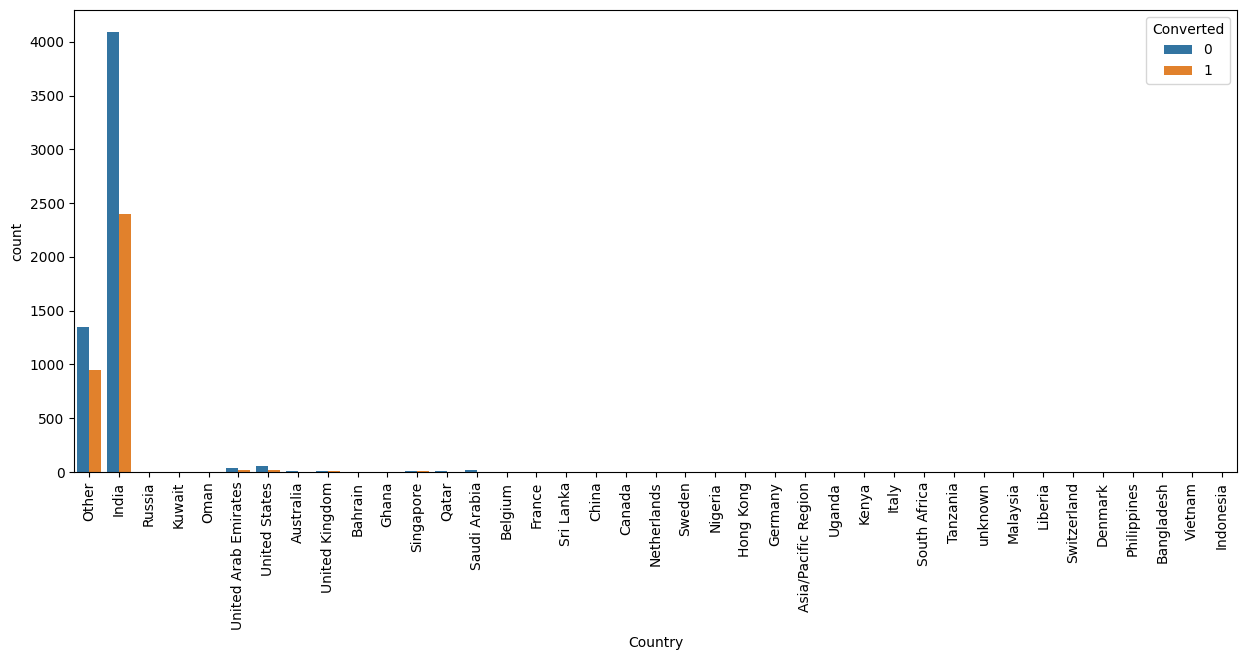

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Most of the data is concentrated in India and and high number of null values so it will be helpful for further analysis, and hence Country can be dropped

In [53]:
df.drop('Country', axis=1, inplace=True)

### What is your current occupation

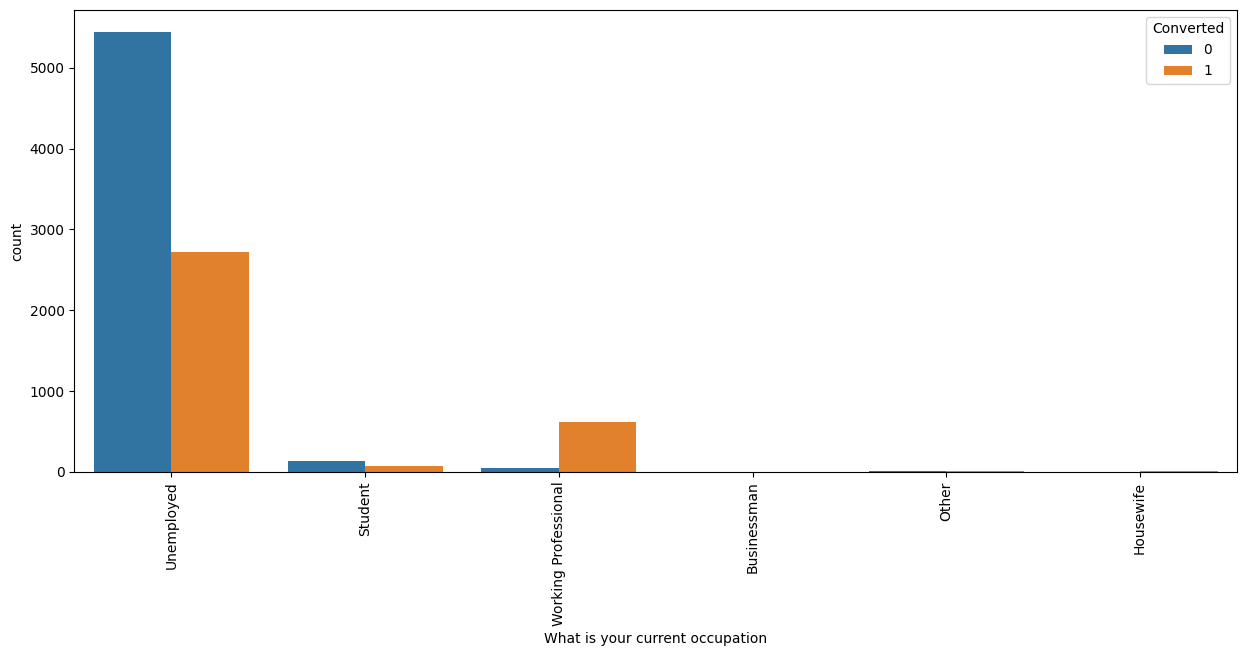

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>Most of the data is concentrated towards Unemployed. Working Professionals have more conversio rate.

### What matters most to you in choosing a course

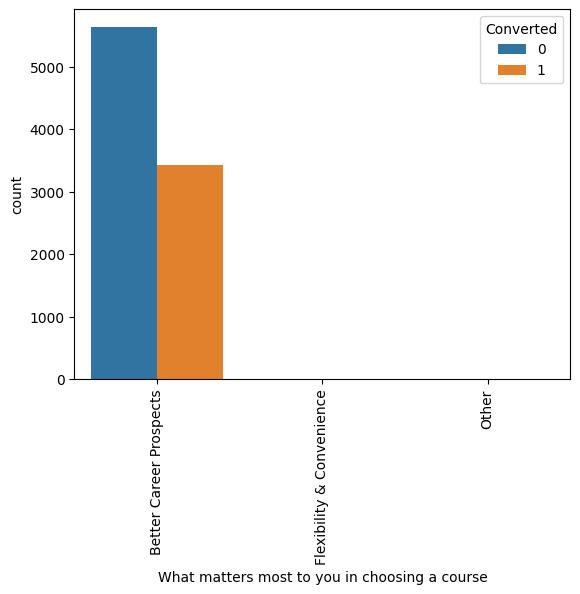

In [55]:

sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

<b>Inference: </b><br>The data is unbalance and is not distributed throughout, so we can drop this variable

In [56]:
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

### Other Categorical Variables

In [57]:
cols=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
      'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
      'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

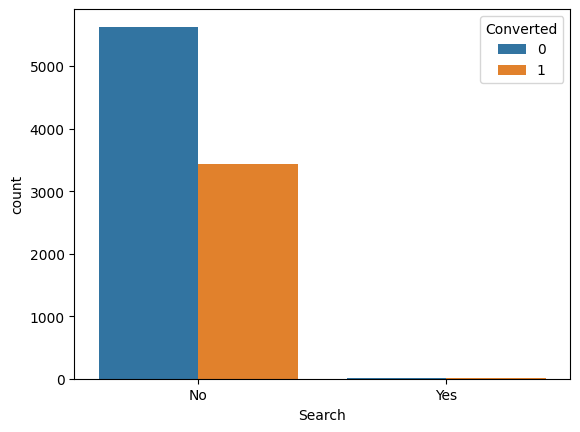

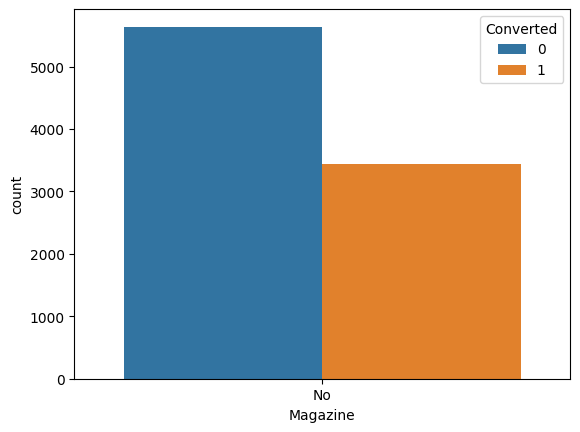

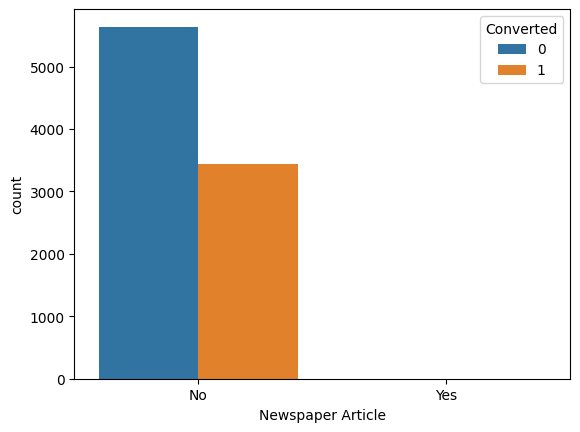

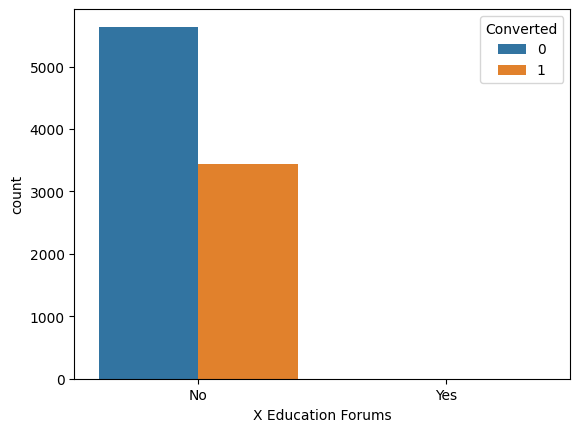

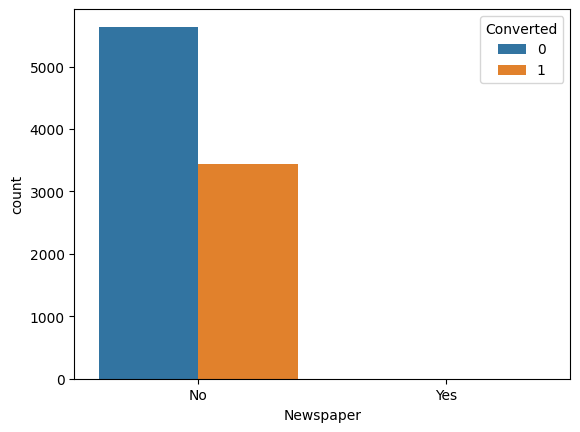

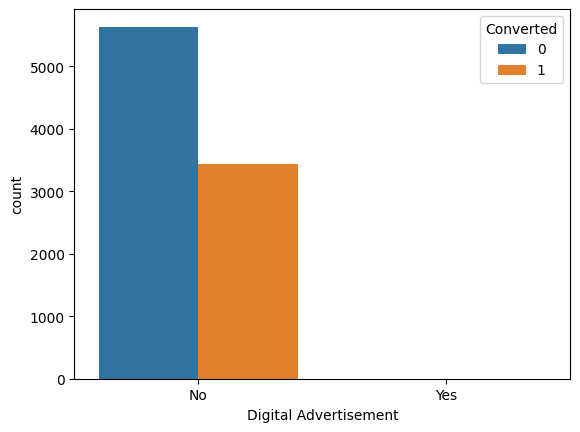

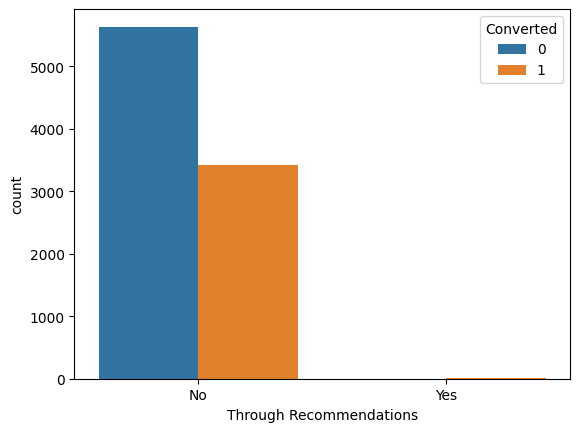

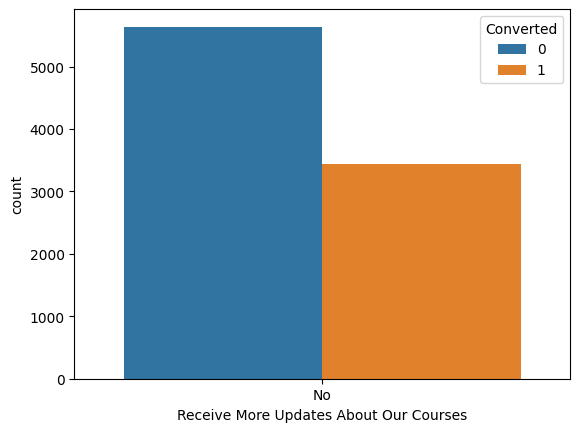

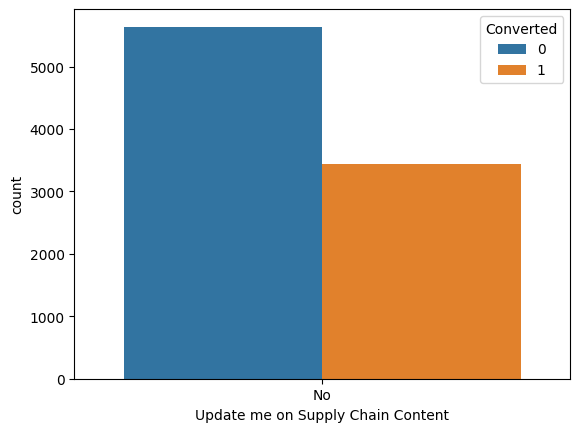

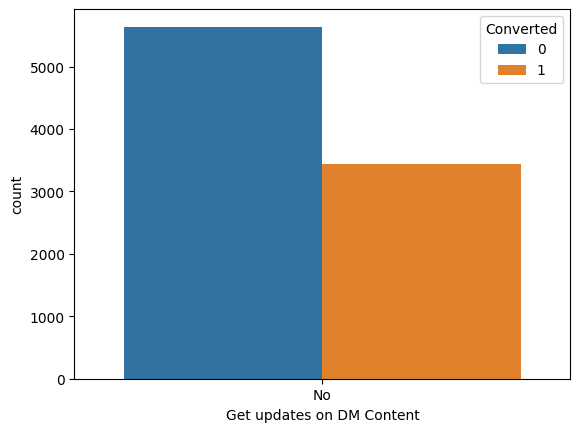

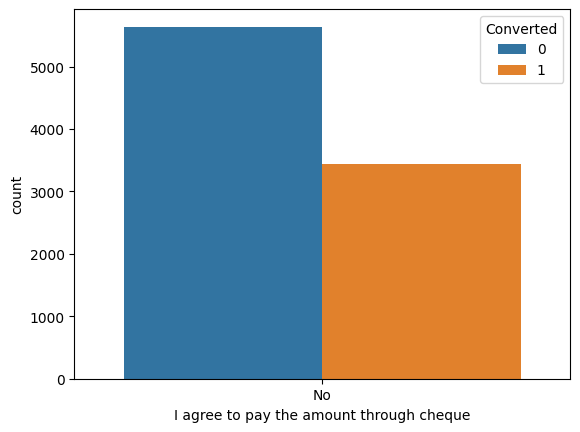

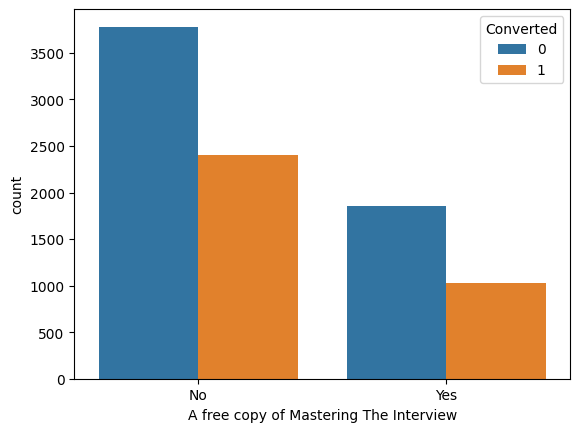

In [58]:
for i in cols:
    sns.countplot(x = i, hue = "Converted", data = df)
    plt.show()

<b>Inference:</b><br>As we can see in the plots, the data is highly imbamanced , and hence we drop them all.

In [59]:
df.drop(cols, axis=1, inplace=True)

## Numerical Variables

### TotalVisits

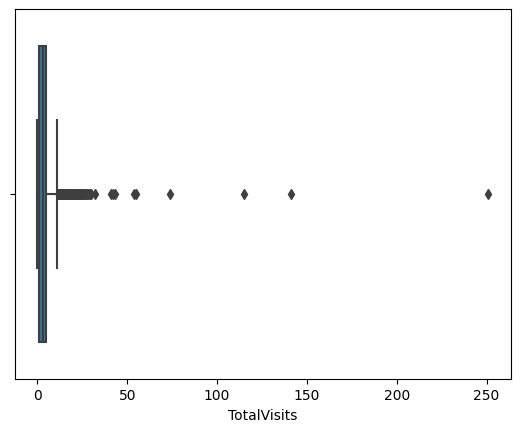

In [60]:
sns.boxplot(x = 'TotalVisits', data = df)
plt.show()

In [61]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<b>Inference:</b><br>There is outliers here and the difference between the max value and 99 percentile is too high, so we have to handle outliers here by capping it to 95 percentile

In [62]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

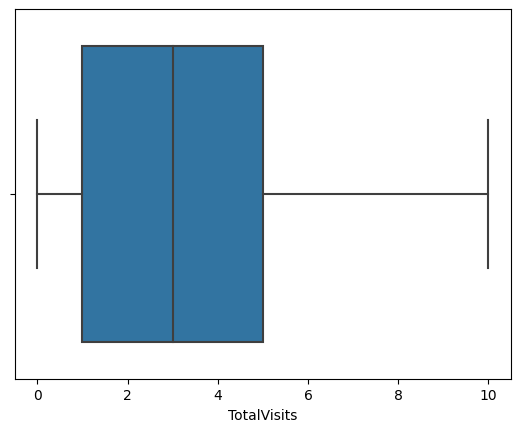

In [63]:
sns.boxplot(x = 'TotalVisits', data = df)
plt.show()

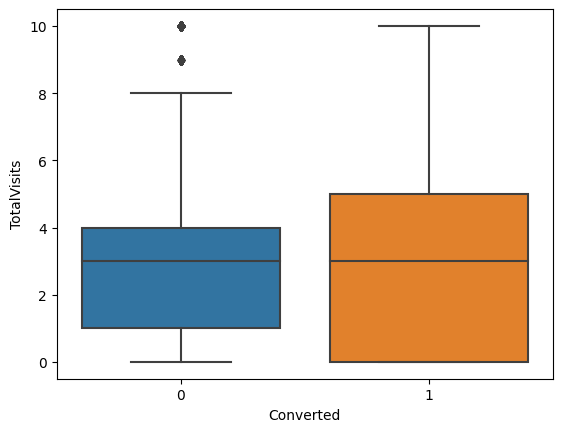

In [64]:
sns.boxplot(y = 'TotalVisits',x= 'Converted', data = df)
plt.show()

<b>Inference:</b><br> The median for both converted and not converted leads are same here, no inference can be made.

### Total Time Spent on Website

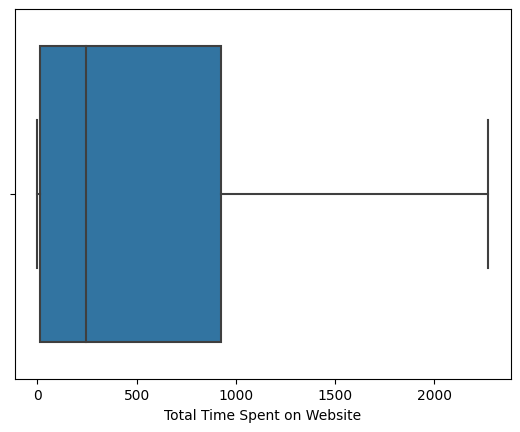

In [65]:
sns.boxplot(x = 'Total Time Spent on Website', data = df)
plt.show()

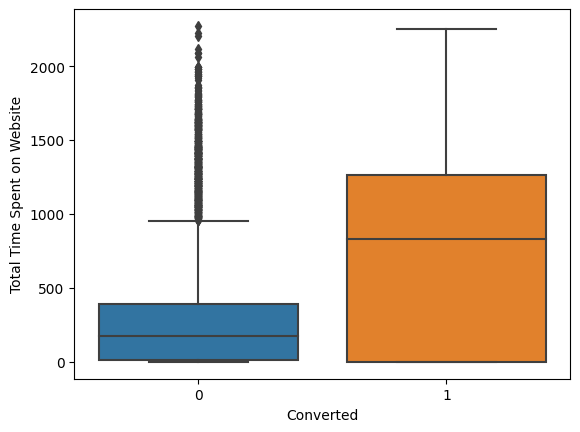

In [66]:
sns.boxplot(y = 'Total Time Spent on Website',x= 'Converted', data = df)
plt.show()

<b>Inference:</b><br>People/Leads who spend more time of website are more likley to get converted.

### Page Views Per Visit

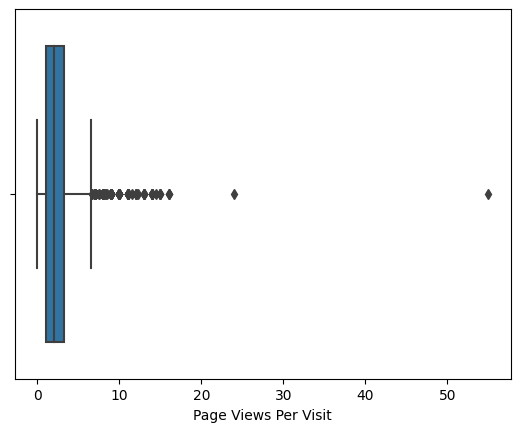

In [67]:
sns.boxplot(x = 'Page Views Per Visit', data = df)
plt.show()

<b>Inference:</b><br>There is outliers here and the difference between the max value and 99 percentile is too high, so we have to handle outliers here by capping it to 95 percentile

In [68]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

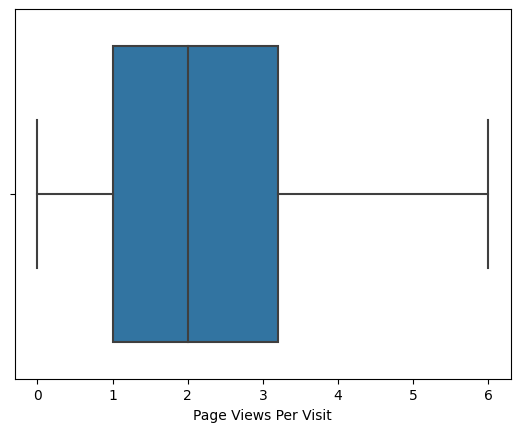

In [69]:
sns.boxplot(x = 'Page Views Per Visit', data = df)
plt.show()

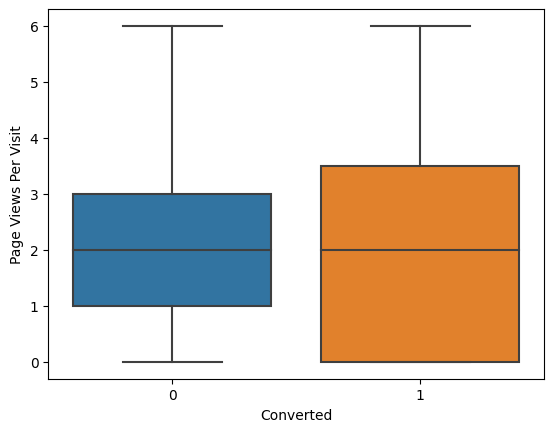

In [70]:
sns.boxplot(y = 'Page Views Per Visit',x= 'Converted', data = df)
plt.show()

<b>Inference:</b><br>The median is same for converted and not converted here, no inference can be made.

### Correlation between numerical variables

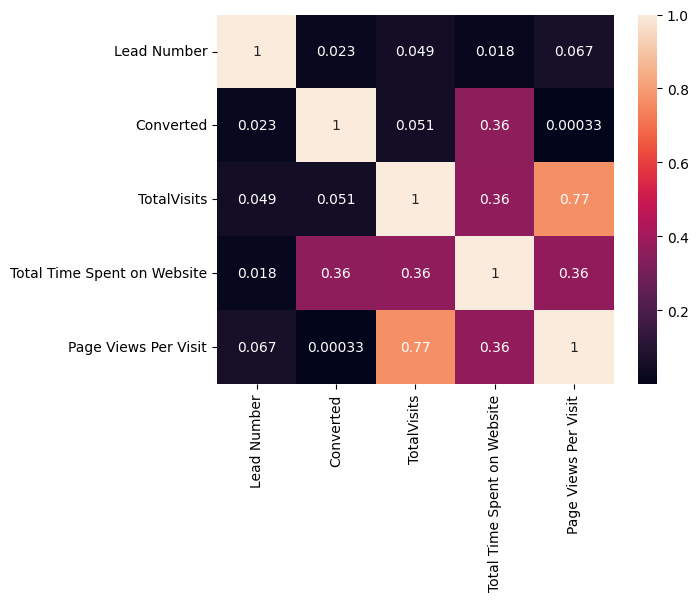

In [71]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# <b> Data Preparation

In [72]:
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

## Create Dummy variables for Categorical variables 

In [73]:
cols= df.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [74]:
dummies = pd.get_dummies(df[cols],drop_first=True,dtype='int')

In [75]:
df = pd.concat([df,dummies], axis=1)
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,Modified,0,...,0,0,1,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened,0,...,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Email Opened,1,...,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,Modified,1,...,0,0,1,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,Modified,1,...,0,0,1,0,0,1,0,0,0,0


In [76]:
df.drop(cols, axis=1, inplace=True)

In [77]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [78]:
df.shape

(9074, 43)

## Test-Train Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=df.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [81]:
y=df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling Features

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [85]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7987,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [86]:
#Conversion rate
(sum(y)/len(y.index))*100

37.85541106458012

# <b> Building Model

In [87]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#### Creating first Model using statsmodel.api 

In [88]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.2
Date:                Tue, 24 Oct 2023   Deviance:                       5276.5
Time:                        23:28:09   Pearson chi2:                 6.50e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1215      2.421      0.876      0.381      -2.624       6.867
TotalVisits                                              0.3627      0.055      6.554      0.000       0.254       0.471
Total Time Spent on Website                              1.1304      0.041     27.908      0.000       1.051       1.210
Page Views Per Visit                                    -0.2738      0.062     -4.413      0.000      -0.395      -0.152
Lead Origin_Landing Page Submission                     -0.1919      0.101     -1.896      0.058      -0.390       0.007
Lead Origin_Lead Add Form                               -0.1293      1.672     -0.077      0.938      -3.407       3.148
Lead Origin_Lead Import                                 25.1738   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -3.0445      2.107     -1.445      0.149      -7.175       1.085
Lead Source_Facebook                                   -26.5527   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.6502      2.106     -1.258      0.208      -6.778       1.478
Lead Source_Live Chat                                   21.6787   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      20.5489   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.6803      2.100     -0.800      0.424      -5.796       2.435
Lead Source_Organic Search                              -2.9967      2.109     -1.421      0.155      -7.130       1.137
Lead Source_Pay per Click Ads                          -24.2011   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -26.1086   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.1353      1.292      0.879      0.380      -1.397       3.667
Lead Source_Referral Sites                              -3.0979      2.130     -1.454      0.146      -7.273       1.077
Lead Source_Social Media                                -0.3230      2.566     -0.126      0.900      -5.352       4.706
Lead Source_WeLearn                                   7.659e-11    1.7e-06   4.51e-05      1.000   -3.33e-06    3.33e-06
Lead Source_Welingak Website                             3.0045      1.463      2.054      0.040       0.138       5.871
Lead Source_bing                                        -2.0412      2.515     -0.812      0.417      -6.970       2.887
Lead Source_blog                                       -25

#### Creating a LogisticRegression() object and running RFE for Feature selection.
we have chosen that the number of Features to be used is 15.

In [89]:
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 21),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_blog', False, 9),
 ('Lead Source_testone', False, 23),
 ('Lead Source_welearnblog_Home', False, 16),
 ('Lead Source_youtubechannel', False, 10),


In [91]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model 1

In [92]:
cols=X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.8
Date:                Tue, 24 Oct 2023   Deviance:                       5395.6
Time:                        23:28:11   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8557      0.636     -1.345      0.178      -2.102       0.391
Total Time Spent on Website                              1.1354      0.040     28.459      0.000       1.057       1.214
Lead Origin_Lead Add Form                                2.2470      0.899      2.498      0.012       0.484       4.010
Lead Origin_Lead Import                                  1.5373      0.454      3.383      0.001       0.647       2.428
Lead Source_Olark Chat                                   1.2485      0.103     12.128      0.000       1.047       1.450
Lead Source_Reference                                    1.6885      0.925      1.826      0.068      -0.124       3.501
Lead Source_Welingak Website                             3.5644      1.152      3.095      0.002       1.307       5.822
Last Activity_Email Opened                               0.8692      0.103      8.416      0.000       0.667       1.072
Last Activity_Olark Chat Conversation                   -0.6957      0.179     -3.886      0.000      -1.047      -0.345
Last Activity_SMS Sent                                   0.8511      0.157      5.404      0.000       0.542       1.160
What is your current occupation_Housewife               21.5870   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Student                 -0.9660      0.669     -1.444      0.149      -2.277       0.345
What is your current occupation_Unemployed              -1.3264      0.634     -2.093      0.036      -2.568      -0.085
What is your current occupation_Working Professional     1.4198      0.658      2.158      0.031       0.130       2.709
Last Notable Activity_Others                             1.2020      0.241      4.991      0.000       0.730       1.674
Last Notable Activity_SMS Sent                           1.3922      0.146      9.556      0.000       1.107       1.678
========================================================================================================================
"""

#### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [93]:
#dropping 'What is your current occupation_Housewife'
cols= cols.drop('What is your current occupation_Housewife', 1)

## Model 2

In [94]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.6
Date:                Tue, 24 Oct 2023   Deviance:                       5399.1
Time:                        23:29:25   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3959      0.580     -0.682      0.495      -1.533       0.741
Total Time Spent on Website                              1.1344      0.040     28.453      0.000       1.056       1.213
Lead Origin_Lead Add Form                                2.2460      0.899      2.498      0.013       0.483       4.008
Lead Origin_Lead Import                                  1.5349      0.454      3.378      0.001       0.644       2.426
Lead Source_Olark Chat                                   1.2466      0.103     12.113      0.000       1.045       1.448
Lead Source_Reference                                    1.6935      0.925      1.832      0.067      -0.119       3.506
Lead Source_Welingak Website                             3.5641      1.151      3.095      0.002       1.307       5.821
Last Activity_Email Opened                               0.8733      0.103      8.458      0.000       0.671       1.076
Last Activity_Olark Chat Conversation                   -0.6950      0.179     -3.880      0.000      -1.046      -0.344
Last Activity_SMS Sent                                   0.8526      0.158      5.412      0.000       0.544       1.161
What is your current occupation_Student                 -1.4284      0.616     -2.317      0.020      -2.637      -0.220
What is your current occupation_Unemployed              -1.7884      0.578     -3.095      0.002      -2.921      -0.656
What is your current occupation_Working Professional     0.9575      0.604      1.585      0.113      -0.226       2.142
Last Notable Activity_Others                             1.2033      0.241      4.994      0.000       0.731       1.676
Last Notable Activity_SMS Sent                           1.3932      0.146      9.560      0.000       1.108       1.679
========================================================================================================================
"""

#### p-value of variable 'What is your current occupation_Working Professional' is high, so we can drop it.

In [95]:
cols= cols.drop('What is your current occupation_Working Professional', 1)

## Model 3

In [98]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.1
Date:                Tue, 24 Oct 2023   Deviance:                       5404.2
Time:                        23:35:10   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4853      0.186      2.603      0.009       0.120       0.851
Total Time Spent on Website                    1.1333      0.040     28.425      0.000       1.055       1.211
Lead Origin_Lead Add Form                      3.8706      0.221     17.526      0.000       3.438       4.303
Lead Origin_Lead Import                        1.5366      0.454      3.387      0.001       0.647       2.426
Lead Source_Olark Chat                         1.2445      0.103     12.089      0.000       1.043       1.446
Lead Source_Welingak Website                   1.9377      0.750      2.582      0.010       0.467       3.408
Last Activity_Email Opened                     0.8761      0.103      8.484      0.000       0.674       1.079
Last Activity_Olark Chat Conversation         -0.6928      0.179     -3.865      0.000      -1.044      -0.341
Last Activity_SMS Sent                         0.8602      0.157      5.467      0.000       0.552       1.169
What is your current occupation_Student       -2.3090      0.278     -8.315      0.000      -2.853      -1.765
What is your current occupation_Unemployed    -2.6725      0.176    -15.227      0.000      -3.016      -2.328
Last Notable Activity_Others                   1.2099      0.241      5.027      0.000       0.738       1.682
Last Notable Activity_SMS Sent                 1.3903      0.145      9.557      0.000       1.105       1.675
==============================================================================================================
"""

#### p-value of variable 'Lead Source_Reference' is high, so we can drop it.

In [97]:
cols= cols.drop('Lead Source_Reference', 1)

## Model 4

In [99]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.1
Date:                Tue, 24 Oct 2023   Deviance:                       5404.2
Time:                        23:35:23   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4853      0.186      2.603      0.009       0.120       0.851
Total Time Spent on Website                    1.1333      0.040     28.425      0.000       1.055       1.211
Lead Origin_Lead Add Form                      3.8706      0.221     17.526      0.000       3.438       4.303
Lead Origin_Lead Import                        1.5366      0.454      3.387      0.001       0.647       2.426
Lead Source_Olark Chat                         1.2445      0.103     12.089      0.000       1.043       1.446
Lead Source_Welingak Website                   1.9377      0.750      2.582      0.010       0.467       3.408
Last Activity_Email Opened                     0.8761      0.103      8.484      0.000       0.674       1.079
Last Activity_Olark Chat Conversation         -0.6928      0.179     -3.865      0.000      -1.044      -0.341
Last Activity_SMS Sent                         0.8602      0.157      5.467      0.000       0.552       1.169
What is your current occupation_Student       -2.3090      0.278     -8.315      0.000      -2.853      -1.765
What is your current occupation_Unemployed    -2.6725      0.176    -15.227      0.000      -3.016      -2.328
Last Notable Activity_Others                   1.2099      0.241      5.027      0.000       0.738       1.682
Last Notable Activity_SMS Sent                 1.3903      0.145      9.557      0.000       1.105       1.675
==============================================================================================================
"""

### Calculating VIF

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,6.03
11,Last Notable Activity_SMS Sent,4.86
9,What is your current occupation_Unemployed,3.73
5,Last Activity_Email Opened,2.41
3,Lead Source_Olark Chat,1.76
6,Last Activity_Olark Chat Conversation,1.71
1,Lead Origin_Lead Add Form,1.52
4,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.29
8,What is your current occupation_Student,1.07


#### 'Last Activity_SMS Sent' has high VIF, we can drop it.

In [103]:
cols= cols.drop('Last Activity_SMS Sent', 1)

## Model 5

In [104]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.7
Date:                Tue, 24 Oct 2023   Deviance:                       5433.4
Time:                        23:40:08   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3797
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.7087      0.180      3.933      0.000       0.355       1.062
Total Time Spent on Website                    1.1331      0.040     28.537      0.000       1.055       1.211
Lead Origin_Lead Add Form                      3.9443      0.221     17.825      0.000       3.511       4.378
Lead Origin_Lead Import                        1.6102      0.456      3.528      0.000       0.716       2.505
Lead Source_Olark Chat                         1.2509      0.103     12.173      0.000       1.050       1.452
Lead Source_Welingak Website                   1.9836      0.751      2.642      0.008       0.512       3.455
Last Activity_Email Opened                     0.6271      0.089      7.014      0.000       0.452       0.802
Last Activity_Olark Chat Conversation         -0.9421      0.172     -5.489      0.000      -1.278      -0.606
What is your current occupation_Student       -2.3209      0.276     -8.414      0.000      -2.862      -1.780
What is your current occupation_Unemployed    -2.6494      0.174    -15.203      0.000      -2.991      -2.308
Last Notable Activity_Others                   0.9631      0.235      4.097      0.000       0.502       1.424
Last Notable Activity_SMS Sent                 2.0024      0.098     20.428      0.000       1.810       2.195
==============================================================================================================
"""

### Calculating VIF

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,3.05
5,Last Activity_Email Opened,2.14
3,Lead Source_Olark Chat,1.76
10,Last Notable Activity_SMS Sent,1.74
6,Last Activity_Olark Chat Conversation,1.63
1,Lead Origin_Lead Add Form,1.49
4,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.29
7,What is your current occupation_Student,1.06
9,Last Notable Activity_Others,1.05


#### The VIFs look good and we can proceed to use the <b>Model-5</b> for predictions

# Predicting

In [106]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183150
1012    0.742654
9226    0.154893
4750    0.872564
7987    0.585527
1281    0.750359
2880    0.090117
4971    0.901947
7536    0.857146
1248    0.541065
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1831497 , 0.7426535 , 0.15489337, 0.87256416, 0.58552711,
       0.75035914, 0.09011681, 0.90194677, 0.85714649, 0.54106469])

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.183150,3009
1,0,0.742654,1012
2,0,0.154893,9226
3,1,0.872564,4750
4,1,0.585527,7987


In [109]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.183150,3009,0
1,0,0.742654,1012,1
2,0,0.154893,9226,0
3,1,0.872564,4750,1
4,1,0.585527,7987,1


## Metrics

In [110]:
from sklearn import metrics

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3460  445]
 [ 756 1690]]


In [112]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8108959219020627


In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
#sensitivity
TP / float(TP+FN)

0.6909239574816026

In [115]:
#specificity
TN / float(TN+FP)

0.8860435339308579

In [117]:
#False Postive Rate
print(FP/ float(TN+FP))

0.11395646606914213


In [118]:
# positive predictive value 
print (TP / float(TP+FP))

0.7915690866510539


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8206831119544592


### PLOTTING ROC CURVE

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


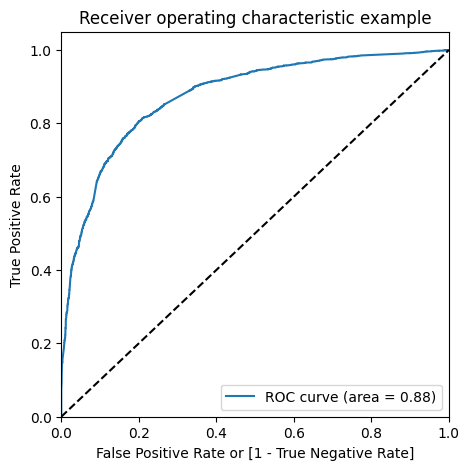

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [123]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183150,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.742654,1012,1,1,1,1,1,1,1,1,1,0,0
2,0,0.154893,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.872564,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.585527,7987,1,1,1,1,1,1,1,0,0,0,0


In [124]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.598961  0.965658  0.369270
0.2   0.2  0.739726  0.908422  0.634059
0.3   0.3  0.785546  0.834015  0.755186
0.4   0.4  0.807432  0.761243  0.836364
0.5   0.5  0.810896  0.690924  0.886044
0.6   0.6  0.787435  0.571137  0.922919
0.7   0.7  0.775311  0.499182  0.948271
0.8   0.8  0.755786  0.409648  0.972599
0.9   0.9  0.708865  0.262469  0.988476


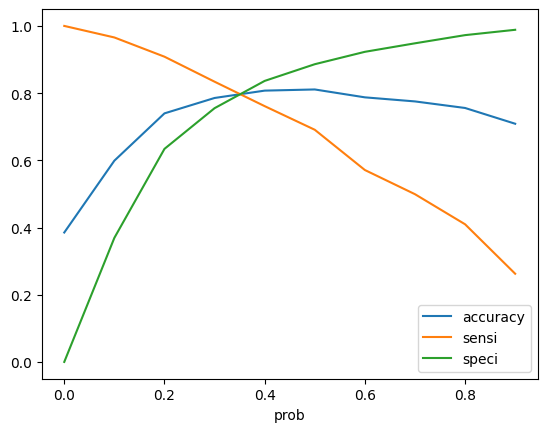

In [125]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [126]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.183150,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.742654,1012,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.154893,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.872564,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.585527,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [127]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.183150,3009,0,18
1,0,0.742654,1012,1,74
2,0,0.154893,9226,0,15
3,1,0.872564,4750,1,87
4,1,0.585527,7987,1,59


In [128]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

final_Predicted
1    2040
0     406
Name: count, dtype: int64